In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("./data/original_data/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 나이가 생존확률에 영향을 주는 요소일까?
- 생존자 수 - 나이 그래프로 특정 나이대의 생존 확률이 높은지 검사하자.
- 가로축은 나이가 와야한다.
- 세로축은 생존 여/부 의 수다.

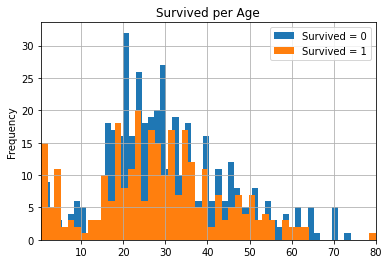

In [66]:
titanic.Age[titanic.Survived == 0].plot.hist(bins=50)
titanic.Age[titanic.Survived == 1].plot.hist(bins=50)

plt.grid()
plt.title("Survived per Age")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

#### histogram은 어떤 경향을 보이는지 잘 알기 힘들다.
- kernel density plot 을 해보자

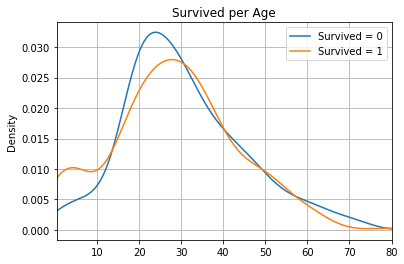

In [67]:
titanic.Age[titanic.Survived == 0].plot.kde()
titanic.Age[titanic.Survived == 1].plot.kde()

plt.grid()
plt.title("Survived per Age")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

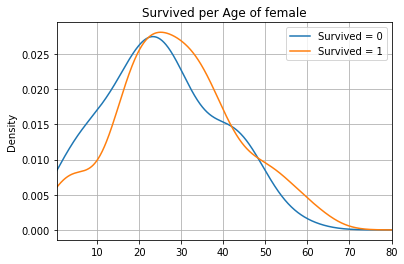

In [68]:
titanic.Age[titanic.Survived == 0][titanic.Sex == "female"].plot.kde()
titanic.Age[titanic.Survived == 1][titanic.Sex == "female"].plot.kde()

plt.grid()
plt.title("Survived per Age of female")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

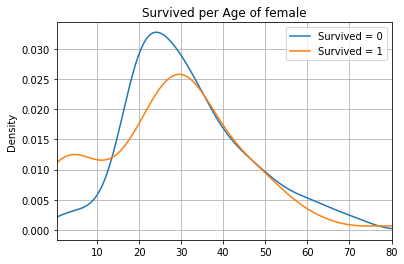

In [69]:
titanic.Age[titanic.Survived == 0][titanic.Sex == "male"].plot.kde()
titanic.Age[titanic.Survived == 1][titanic.Sex == "male"].plot.kde()

plt.grid()
plt.title("Survived per Age of female")
plt.xlim([titanic.Age.min(),titanic.Age.max()])
plt.legend(["Survived = 0","Survived = 1"])
plt.show()

#### 성별이 생존 여부에 영향을 줄까?
- 성별은 남자, 여자 두가지 밖에 없으므로 파이차트를 이용하면 편하겠다.
- "남자" 차트에 생존 1/0 이 표시되도록 그린다.
- "여자" 차트에 생존 1/0 이 표시되도록 그린다.
- 생존 1 의 넓이 차를 통해 성별의 영향 유무를 알 수 있다.

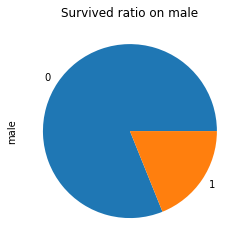

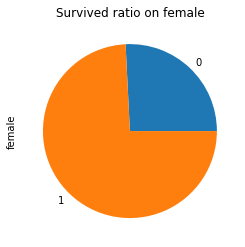

In [75]:
titanic[titanic.Sex == "male"].groupby("Survived").count().Sex.plot.pie()
plt.title("Survived ratio on male")
plt.ylabel("male")
plt.show()

titanic[titanic.Sex == "female"].groupby("Survived").count().Sex.plot.pie()
plt.title("Survived ratio on female")
plt.ylabel("female")
plt.show()